### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 2
### Due: Saturday, Jan 25th at 11.59pm CST
---

In [4]:
# Some important stuff:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx$$

1) What does this integral analytically evaluate to? (Should involve $\sigma$.) Once you work this equation out, we will refer to this equality of the integral and analytic value as EQ1. 

2) Write down the standard form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

3) Manipulate EQ1 such that you can write the integral in terms of a function of $x$ weighted by a normalized half-Gaussian distribution. 

4) Draw $N=10^5$ samples from a $\sigma=2$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your new equation involving a half-Gaussian distribution from (3). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

5) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

6) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

### PART A/B/C

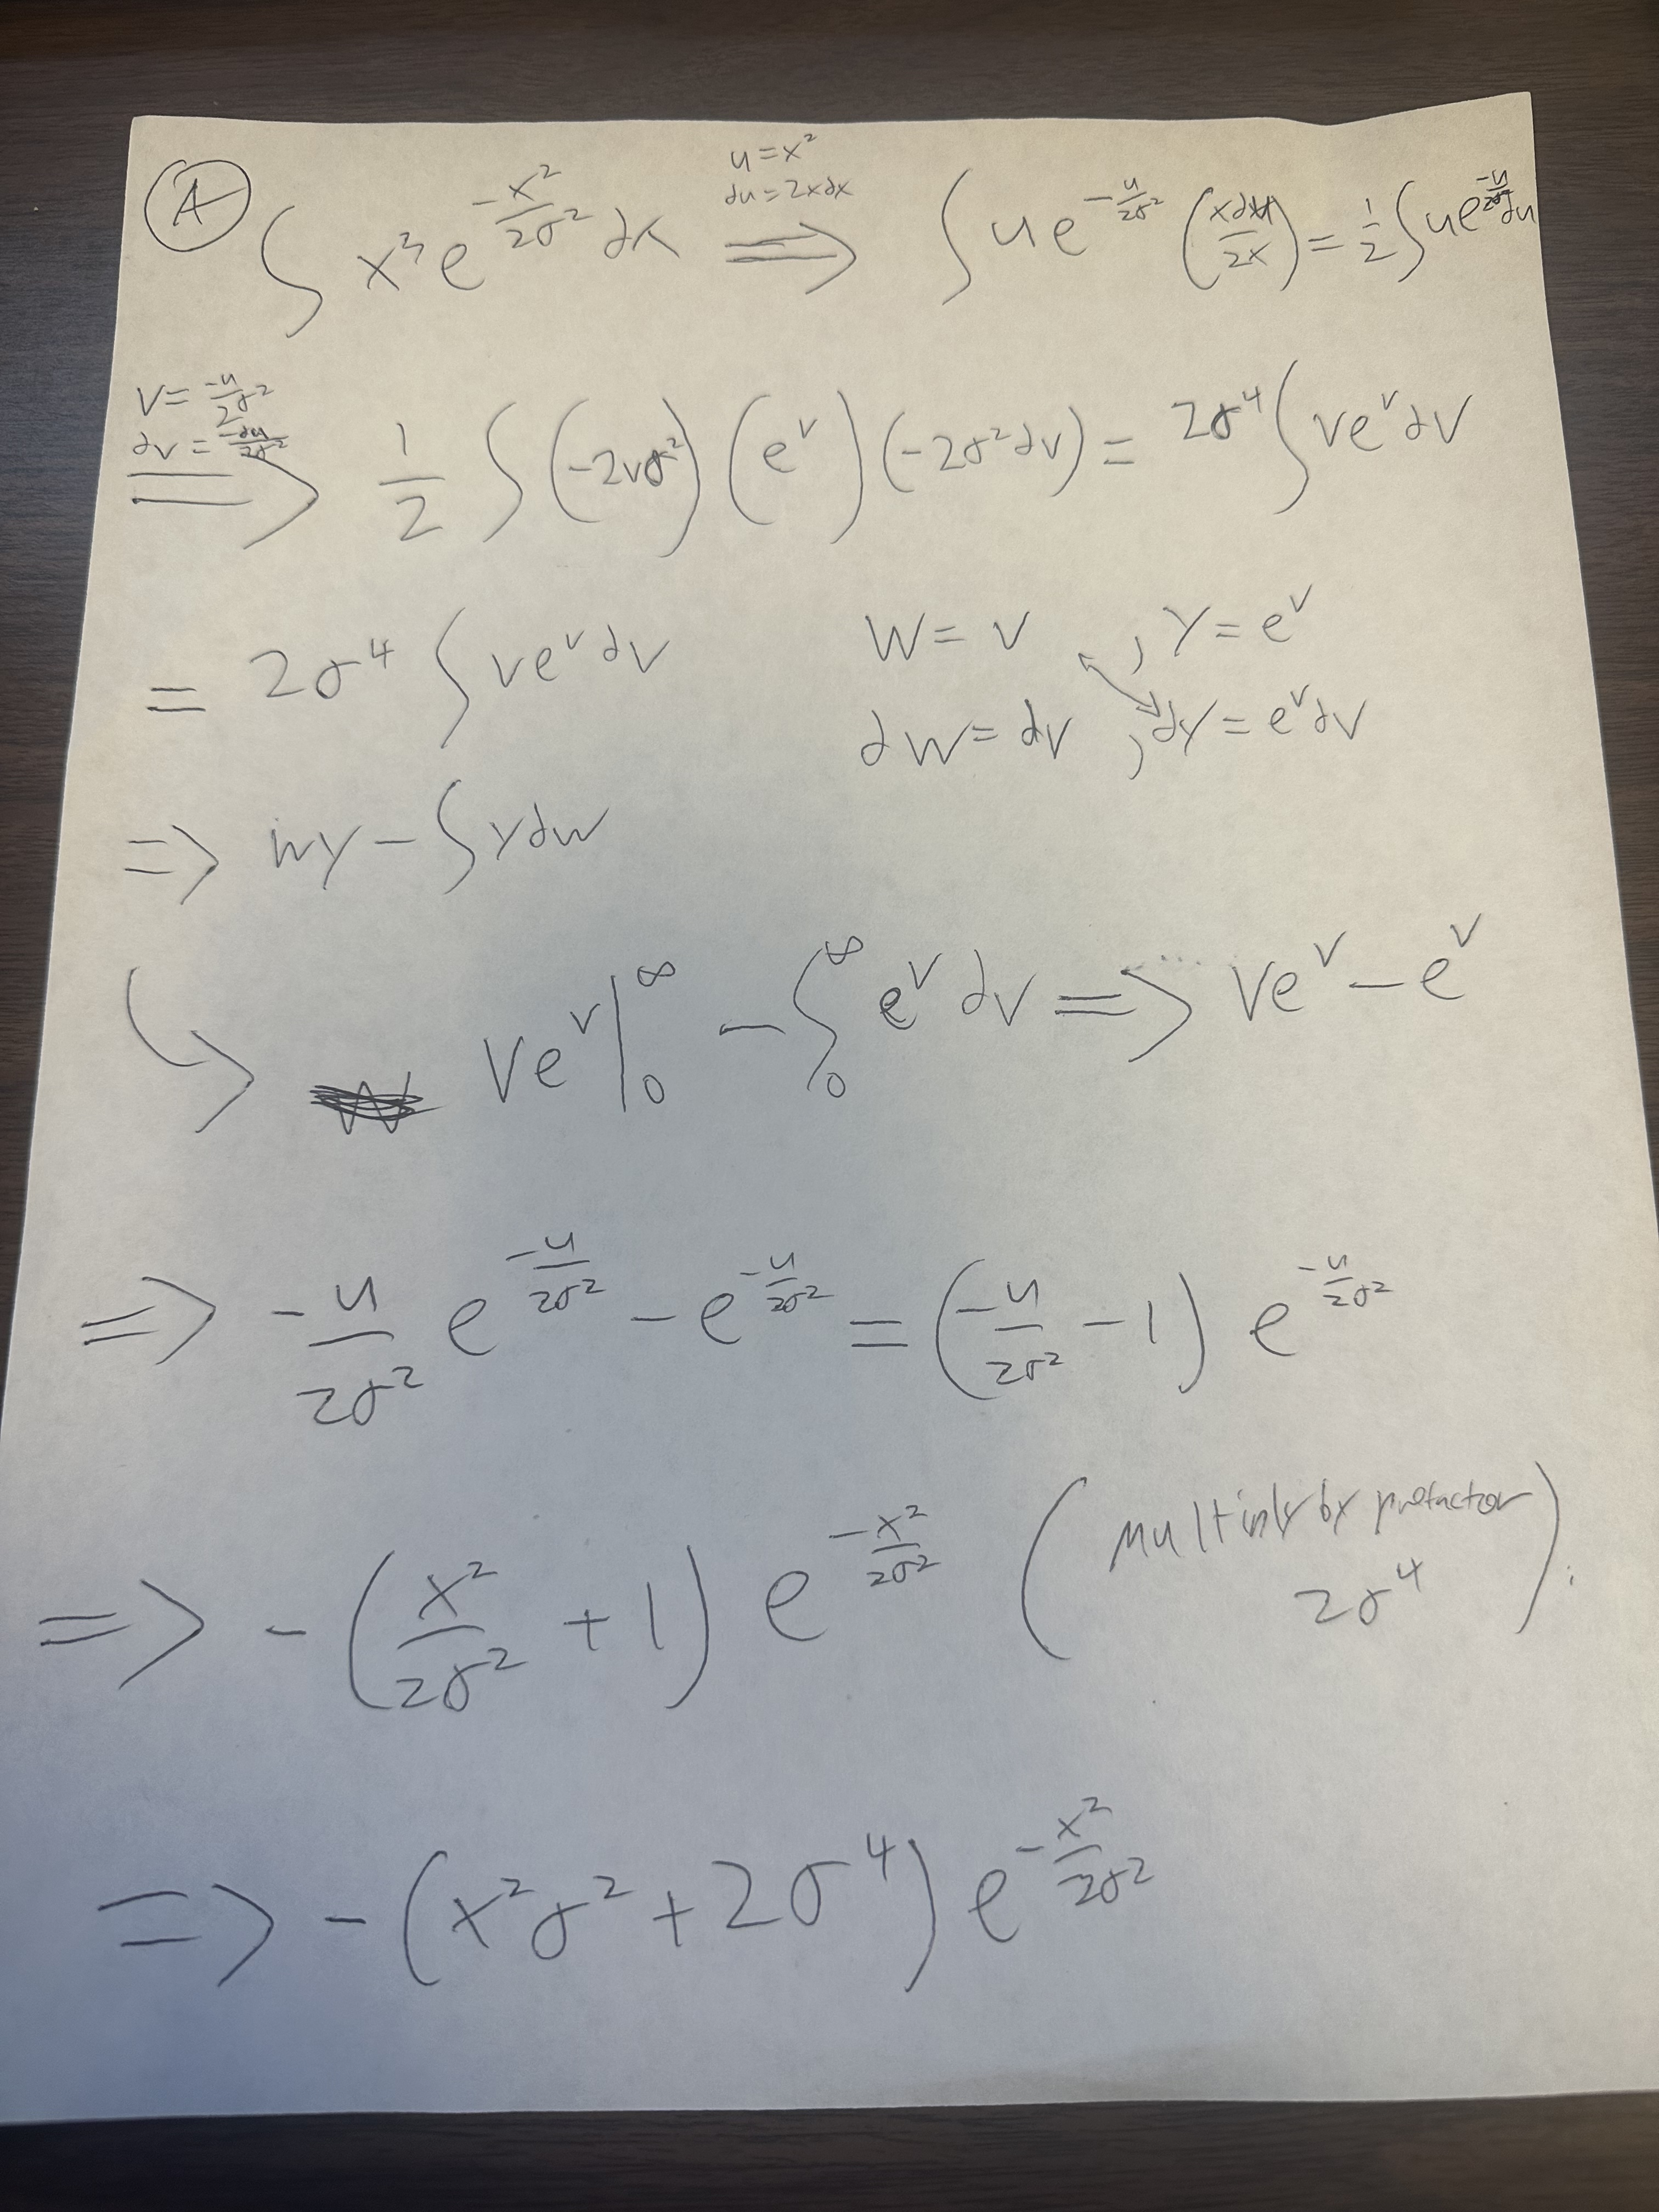

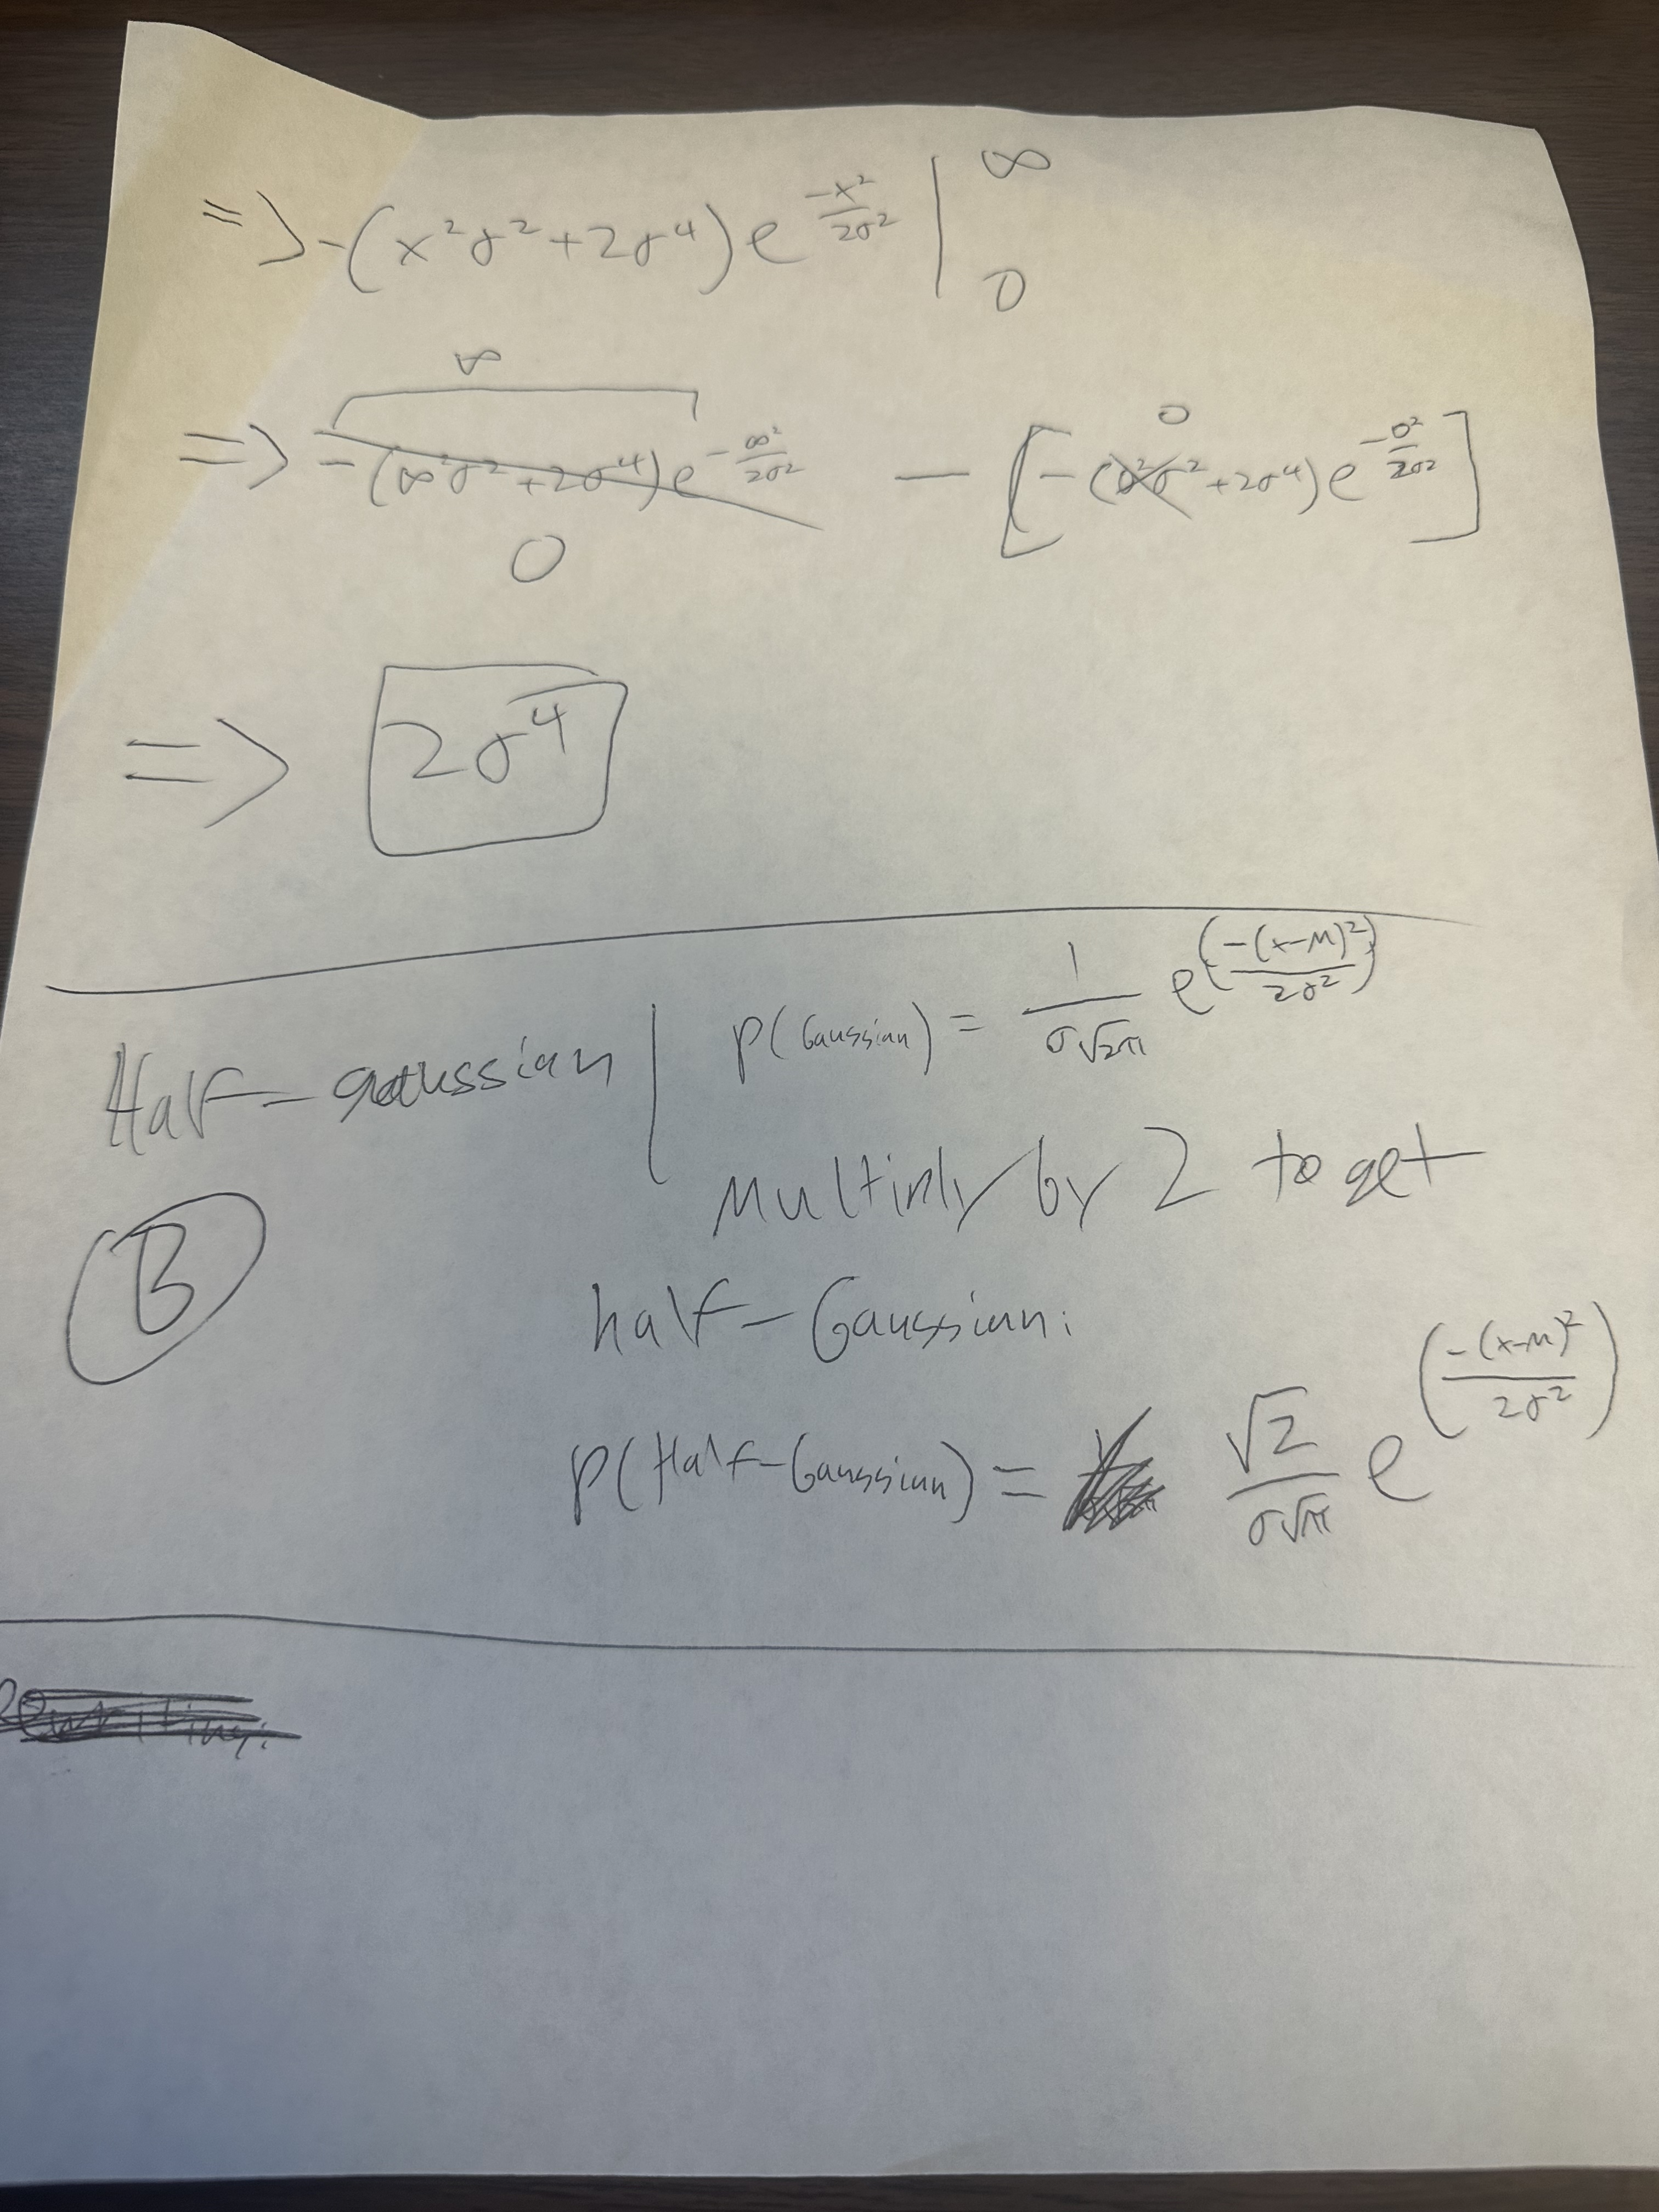

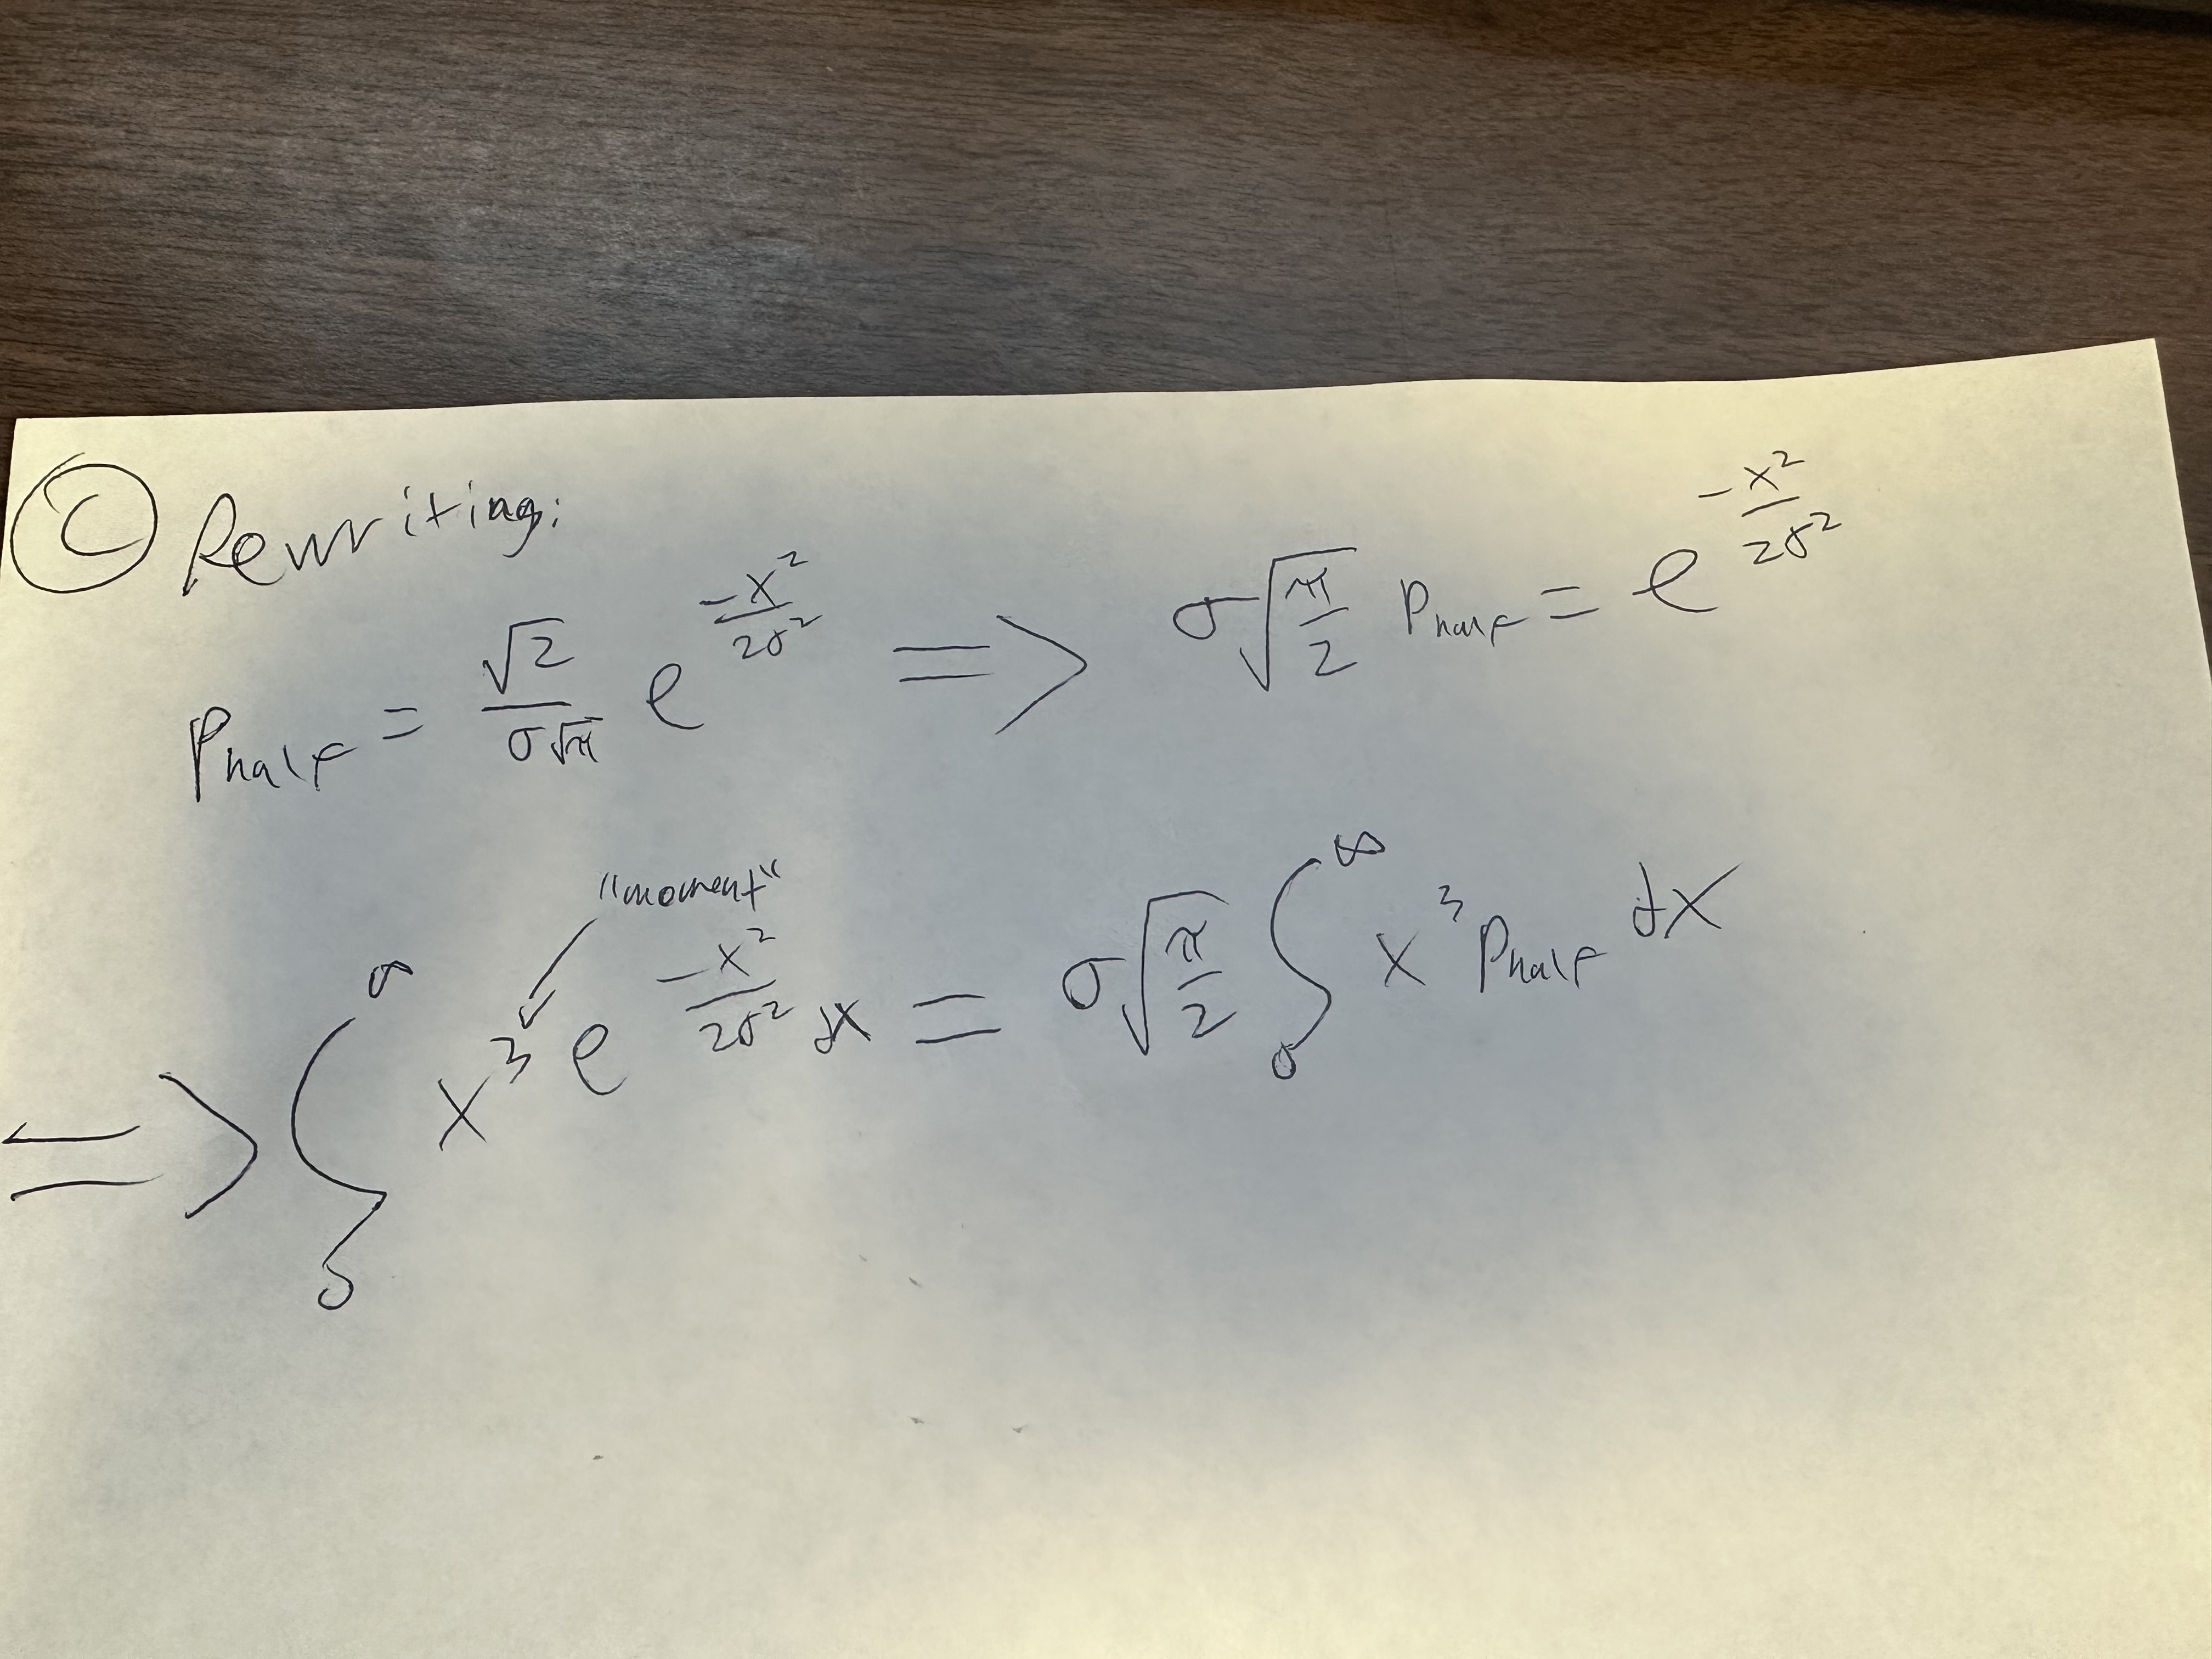

### PART D

In [25]:
import numpy as np

# Parameters
sigma = 2
N = 10**5

# Drawing samples and mask for positive ones!
samples = np.random.normal(0, sigma, N)
half_gaussian_samples = samples[samples > 0]

# Computing the integral
integral_estimate = (np.sqrt(np.pi / 2) * sigma) * np.mean(half_gaussian_samples ** 3) # Half-gaussian factor times expectation value of x^3 under half-Gaussian!!
print(f"Monte Carlo Integral Estimate: {integral_estimate}")


Monte Carlo Integral Estimate: 32.049901563092945


### PART E

In [28]:
# Doing the whole thing 100 times
N_values = [100, 1000, 10000]
results = []
for N in N_values:
    batch_results = []
    for _ in range(100):
        samples = np.random.normal(0, sigma, N) # Random sampling
        half_gaussian_samples = samples[samples > 0] # Masking for positive values
        expectation_x3 = np.mean(half_gaussian_samples**3) # Expectation value of x^3 under half-Gaussian
        integral = (np.sqrt(2 * np.pi) * sigma / 2) * expectation_x3 # Half-Gaussian factor times expectation value of x^3 under half-Gaussian (again)!
        batch_results.append(integral)
    results.append(batch_results)

# Calculate means, mins, and maxes (note I have to cast the damn things bc they were being annoying)
means = [float(np.mean(r)) for r in results]
mins = [float(np.min(r)) for r in results]
maxs = [float(np.max(r)) for r in results]
print(f"Means: {means}")
print(f"Mins: {mins}")
print(f"Maxs: {maxs}")

Means: [32.120864062896295, 32.22865648067477, 31.713179228959977]
Mins: [13.34638208357602, 25.306599973277166, 28.440235955487594]
Maxs: [61.84113229243831, 41.13121817789711, 34.75752971743333]


### PART F

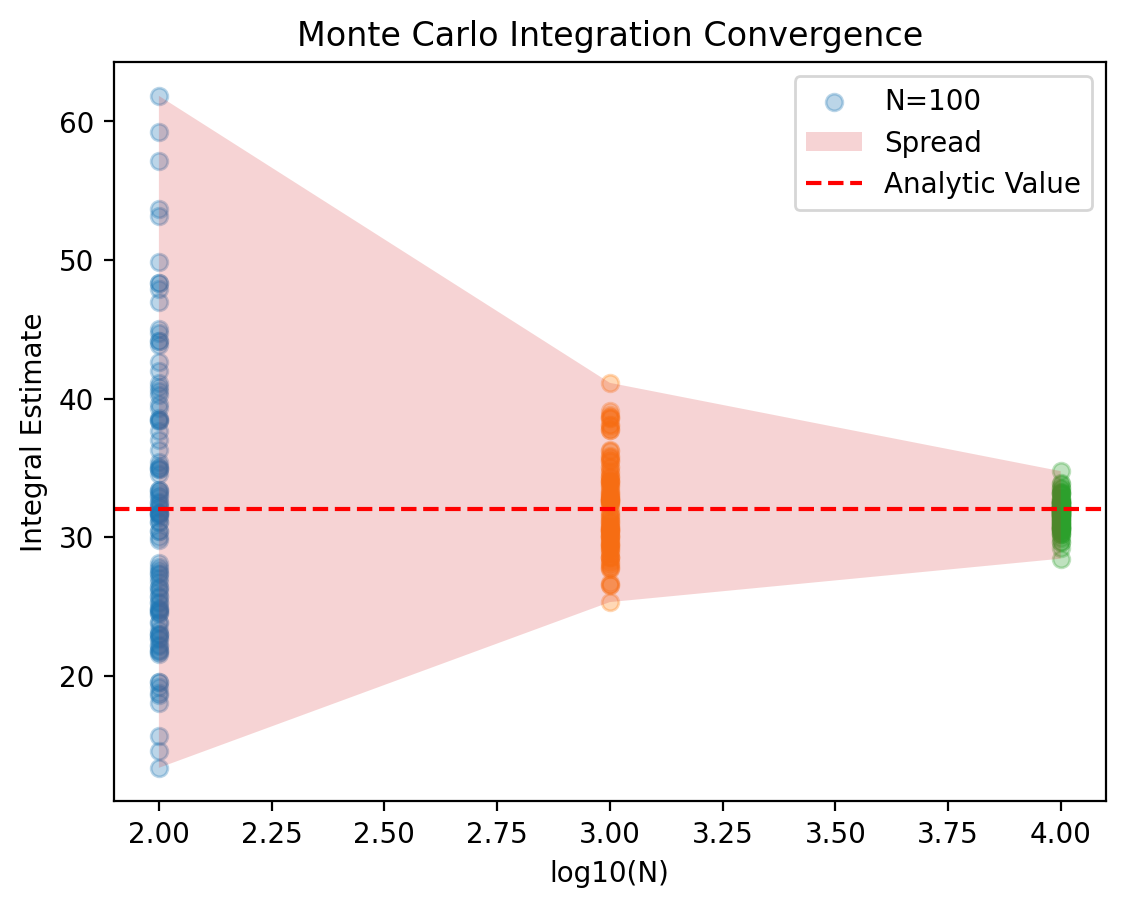

In [30]:
# Plotting log10(N) vs spread of integral estimates
log_N = np.log10(N_values)

# Showcasing the spreads, and how they get smaller with each order of magnitude (YOOOOOO)
plt.figure()
for i, N in enumerate(N_values):
    plt.scatter([log_N[i]] * 100, results[i], alpha=0.3, label=f'N={N}' if i == 0 else "") # Scatter plot of the results!! 

# Filling between min and max for each value of N 
plt.fill_between(log_N, mins, maxs, alpha=0.2, label="Spread") # Cool ass plt function (shout out to Don Terndrup)
plt.axhline(y=sigma**5, color="r", linestyle="--", label="Analytic Value") # The line asked for
plt.xlabel("log10(N)")
plt.ylabel("Integral Estimate")
plt.legend()
plt.title("Monte Carlo Integration Convergence")
plt.show()

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=150$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^5$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 150? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

### PART A

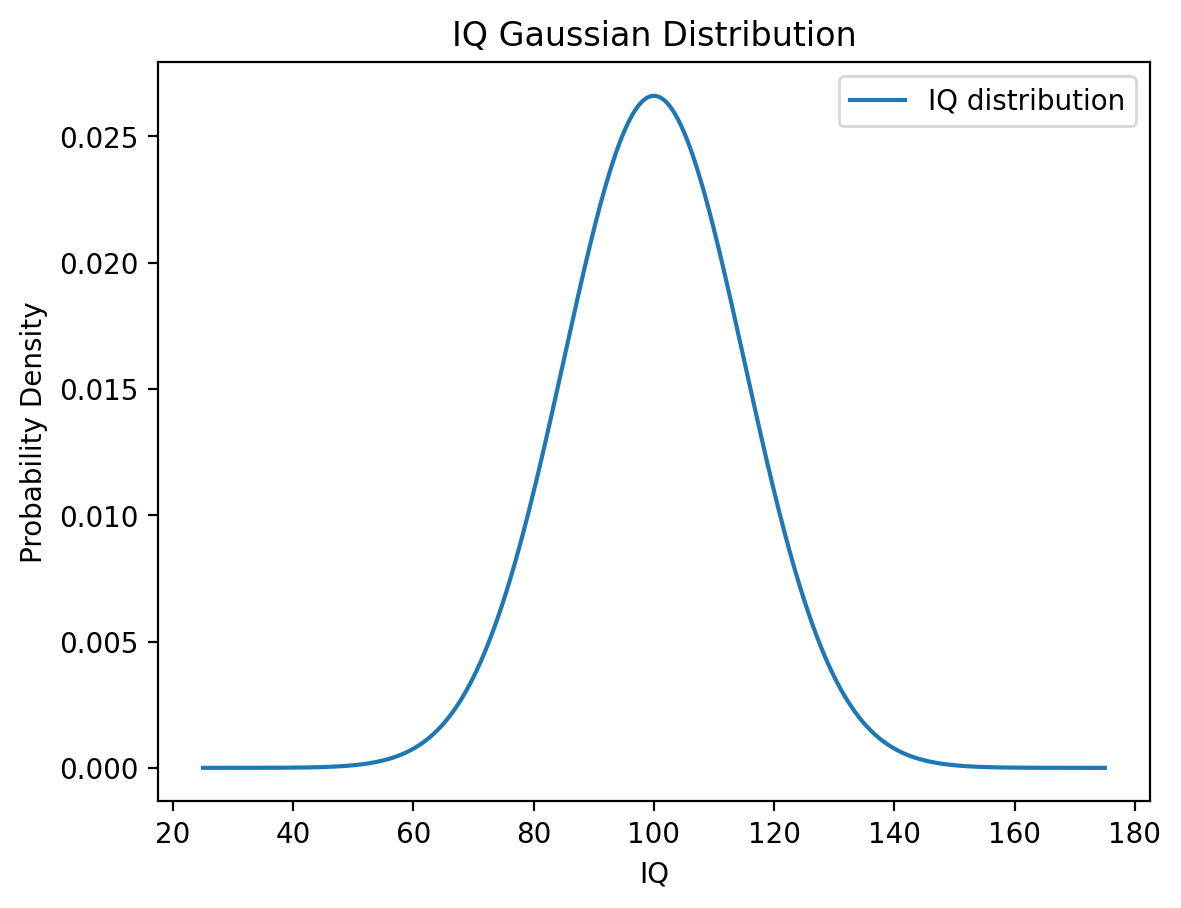

[111.02966303 106.45622505  76.46528802  88.77148069  98.8809392
 118.17619254  92.47735446  88.4735177  116.63654599  72.80302505] 0.00010281859975274035


In [ ]:
mu = 100 # Mean
sigma = 15 # Standard deviation
distGauss_IQ = scipy.stats.norm(loc=mu, scale=sigma) # IQ distribution

# Making the plot
x = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 1000) # The x values
IQ_pdf = distGauss_IQ.pdf(x) # The y values (probability density function)
plt.plot(x, IQ_pdf, label='IQ Distribution') # The plot in question
plt.xlabel('IQ')
plt.ylabel('Probability Density')
plt.title('IQ Gaussian Distribution')
plt.legend()
plt.show()

# Generating the ten random draws using rvs
random_iq_draws = distGauss_IQ.rvs(size=10)

# PDF at 150
pdf_at_150 = distGauss_IQ.pdf(150)

# Printing them both for your eyes to see:
print(random_iq_draws, pdf_at_150)


### PART B

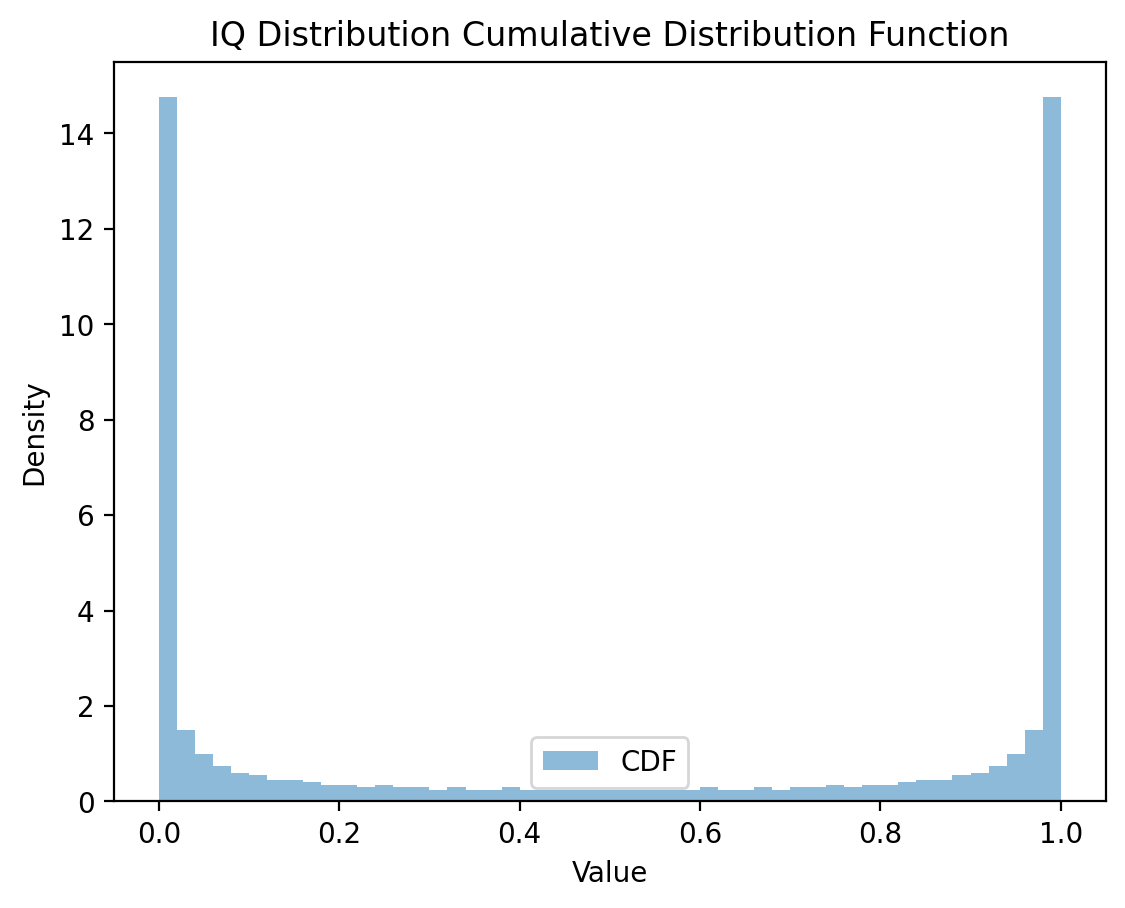

In [11]:
from scipy.interpolate import interp1d

#Getting the cdf
x = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 1000)  # Five sigma away from the mean
IQ_cdf = distGauss_IQ.cdf(x) # The distribution!!!

#Plotting the cdf
plt.hist(IQ_cdf, bins=50, density=True, alpha=0.5, label="CDF")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("IQ Distribution Cumulative Distribution Function")
plt.legend()
plt.show()


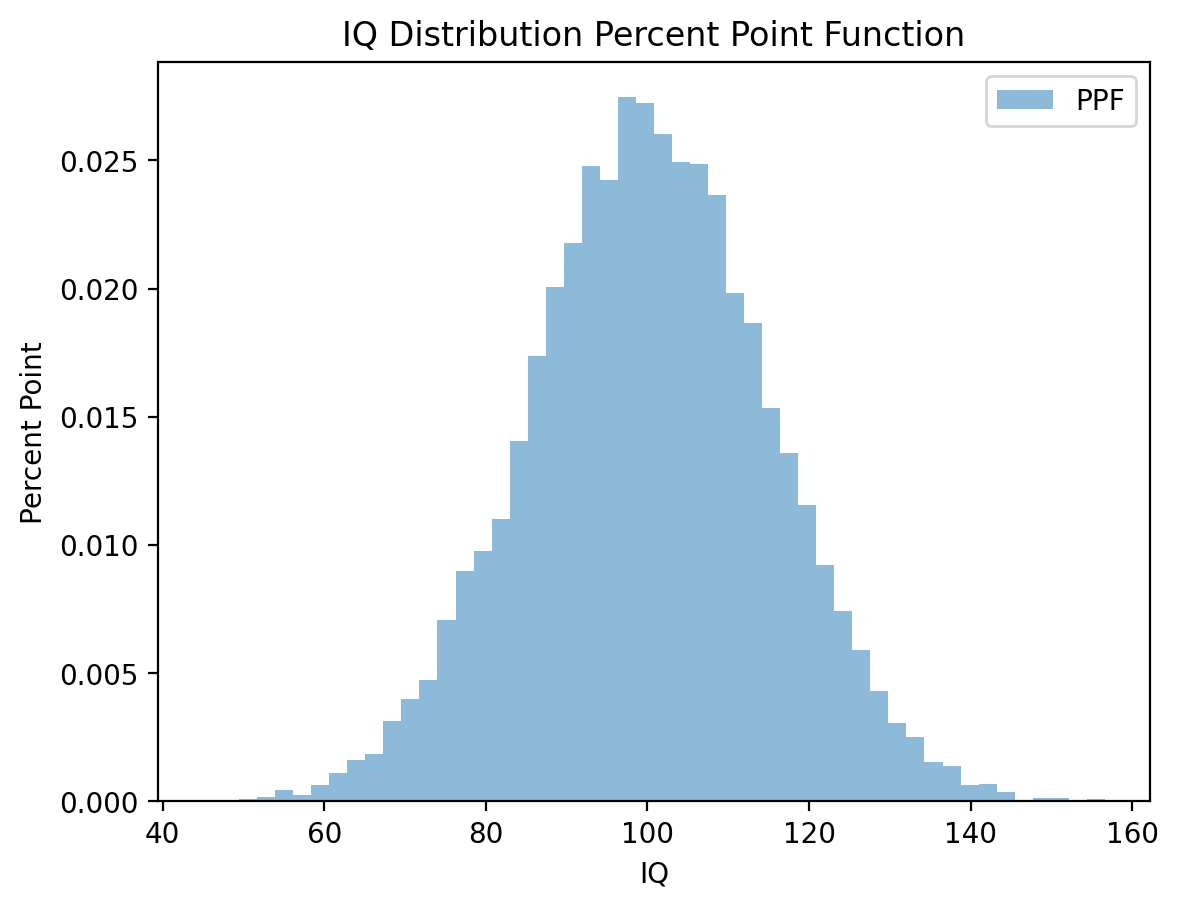

In [18]:
# Now, for the ppf:
u = np.random.uniform(0, 1, 10000)  # Uniform random values
ppf_samples = distGauss_IQ.ppf(u) # The ppf values
plt.hist(ppf_samples, bins=50, density=True, alpha=0.5, label="PPF")
plt.xlabel("IQ")
plt.ylabel("Percent Point")
plt.title("IQ Distribution Percent Point Function")
plt.legend()
plt.show()

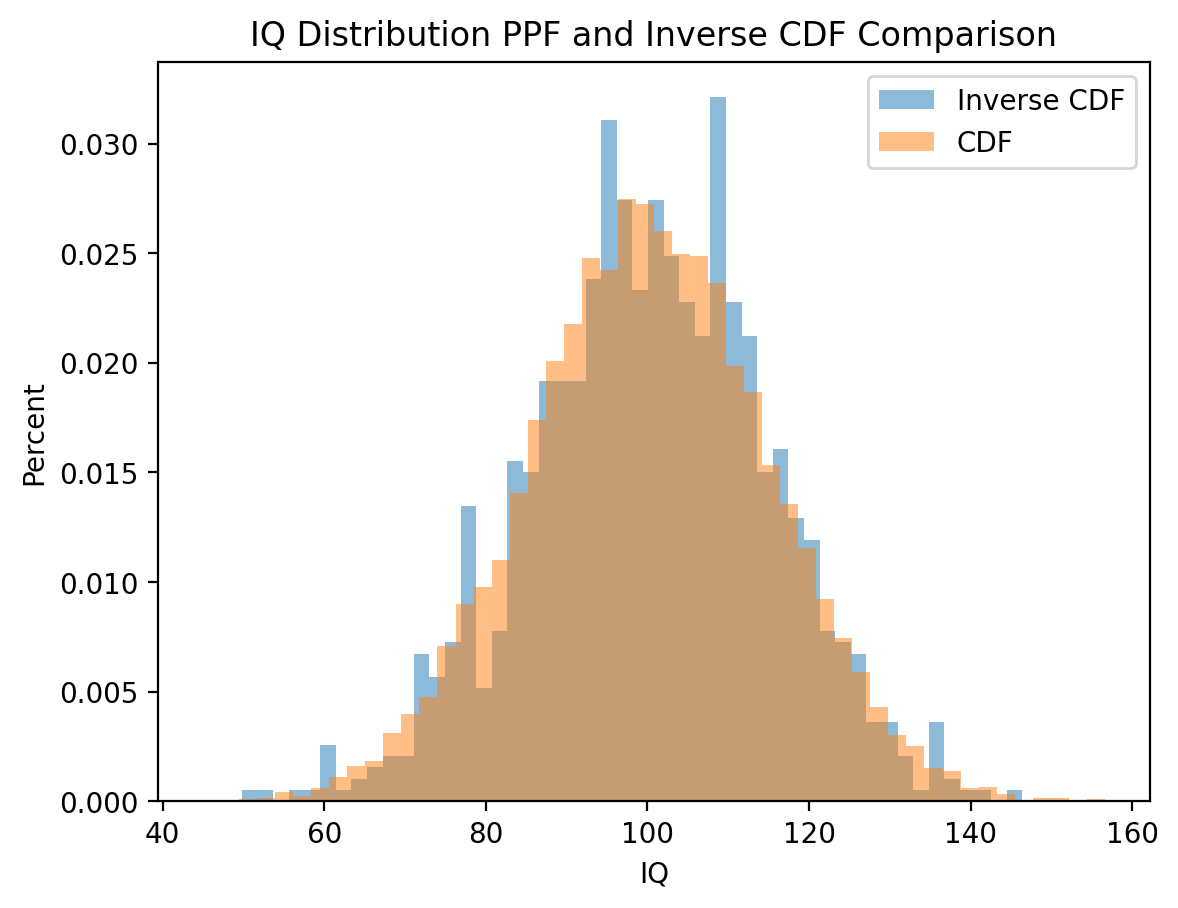

In [19]:
# Now for inverse transform sampling!
inverse_cdf = interp1d(IQ_cdf, x, bounds_error=False, fill_value="extrapolate") # Interpolating the inverse CDF over the x values
u = np.random.uniform(0, 1, 1000) # Uniform random values
inverse_cdf_samples = inverse_cdf(u) # NEW SAMPLES YIPPEE!!!!

# Step 3: Let's see if they all match!
plt.hist(inverse_cdf_samples, bins=50, density=True, alpha=0.5, label="Inverse CDF")
plt.hist(ppf_samples, bins=50, density=True, alpha=0.5, label="CDF")
plt.xlabel("IQ")
plt.ylabel("Percent")
plt.title("IQ Distribution PPF and Inverse CDF Comparison")
plt.legend()
plt.show()

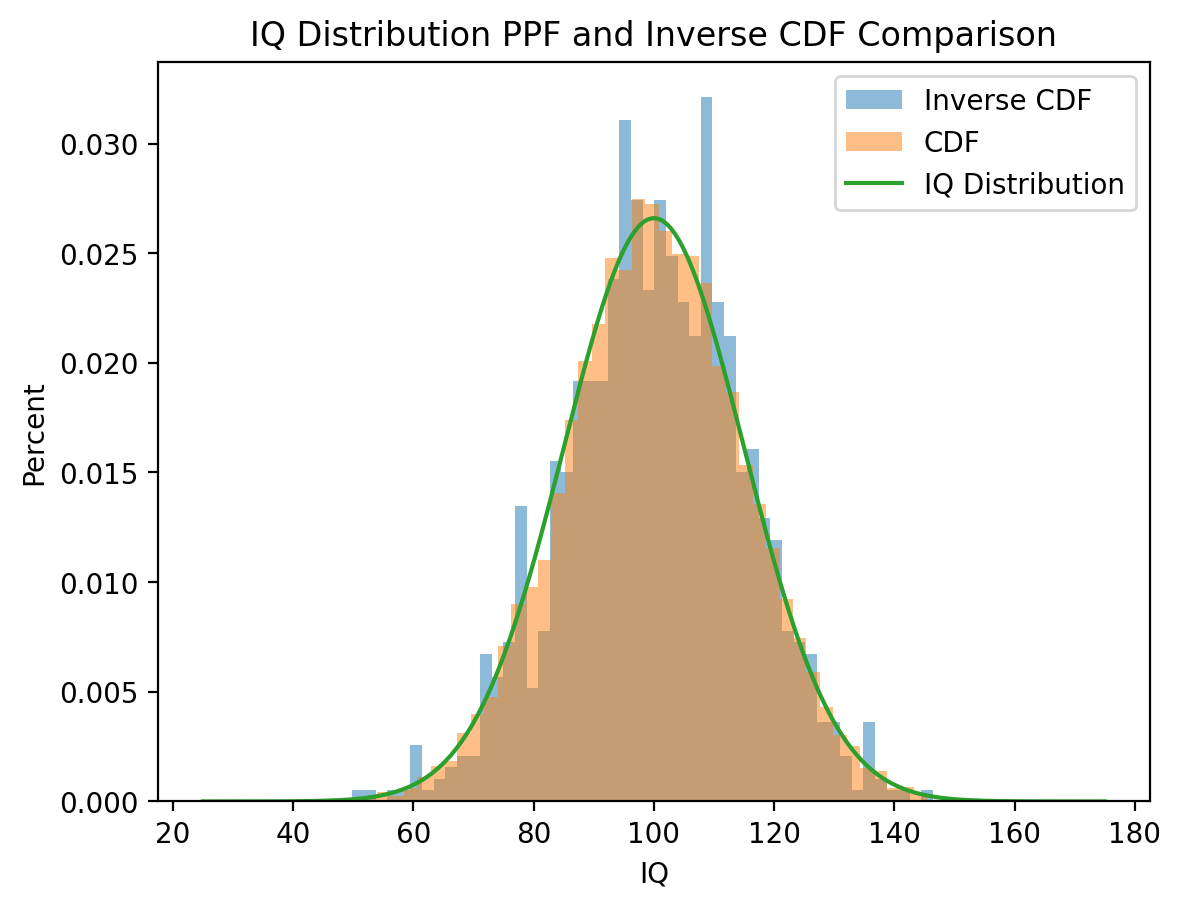

In [20]:
# Now for all three!
plt.hist(inverse_cdf_samples, bins=50, density=True, alpha=0.5, label="Inverse CDF")
plt.hist(ppf_samples, bins=50, density=True, alpha=0.5, label="CDF")
plt.plot(x, IQ_pdf, label='IQ Distribution')
plt.xlabel("IQ")
plt.ylabel("Percent")
plt.title("IQ Distribution PPF and Inverse CDF Comparison")
plt.legend()
plt.show()

# LOOK AT THAT!!! Beautiful!!!

### PART C

In [21]:
# Fraction of people with IQ over 150 will come from the cdf
# Measuring amount of probability below a certain point, so 
# we have to subtract the stuff below 150 from 1

cdf_150 = distGauss_IQ.cdf(150)
over_150_fraction = 1 - cdf_150
print(f"Fraction of people with IQ over 150: {over_150_fraction}")

Fraction of people with IQ over 150: 0.0004290603331967846


### PART D

In [24]:
# The IQ that corresponds to one in a million will 
# come from the ppf, which acts as the inverse of the cdf:

probability = 1 - 10 ** -6 # One in a million!
one_million_iq = norm.ppf(probability, loc=mu, scale=sigma) # The IQ that corresponds to one in a million
print(f"The one in a million IQ is: {one_million_iq}")

The one in a million IQ is: 171.3013646322563


## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

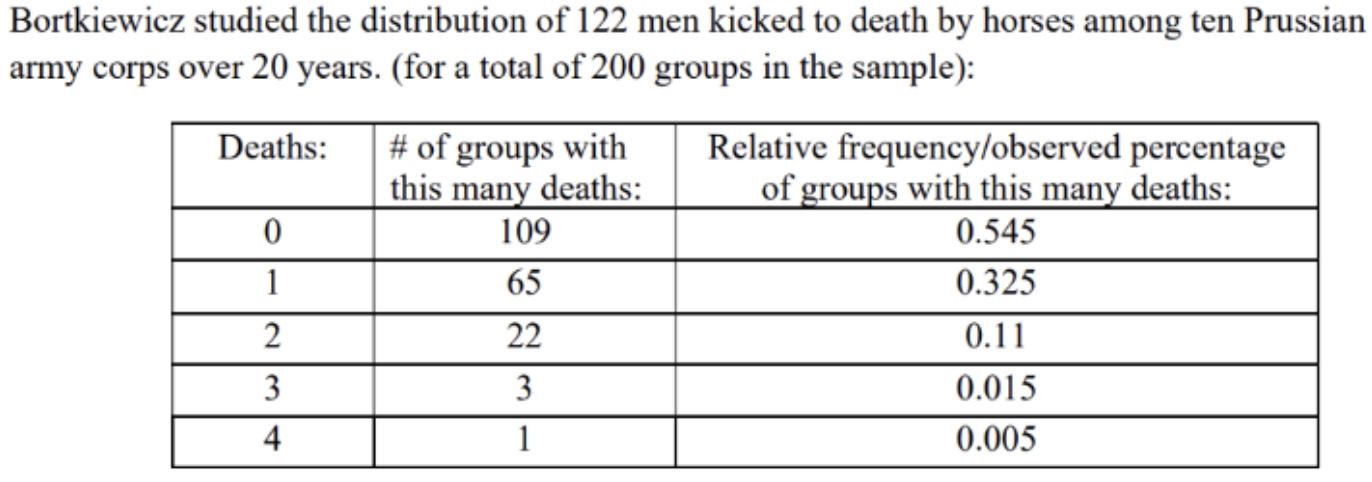

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting soon, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

### PART A

/var/folders/8_/vd_n6g9d37gbs_dfstk2qklw0000gr/T/ipykernel_25288/3633892369.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


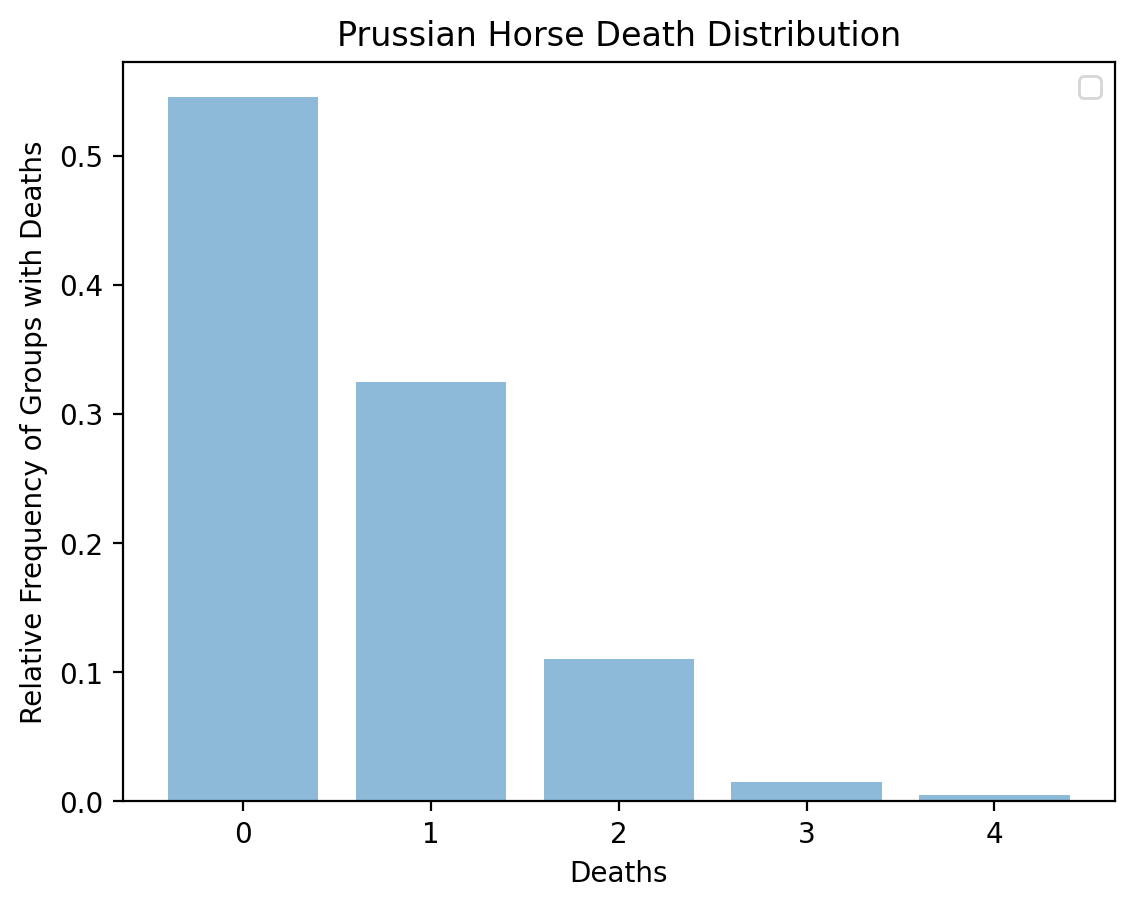

In [10]:
data = [[0, 1, 2, 3, 4], [0.545, 0.325, 0.11, 0.015, 0.005]] # The first and third columns

plt.bar(data[0], data[1], alpha=0.5) # Plotting the data

plt.xlabel('Deaths')
plt.ylabel('Relative Frequency of Groups with Deaths')
plt.legend()
plt.title('Prussian Horse Death Distribution')
plt.show()

### PART B

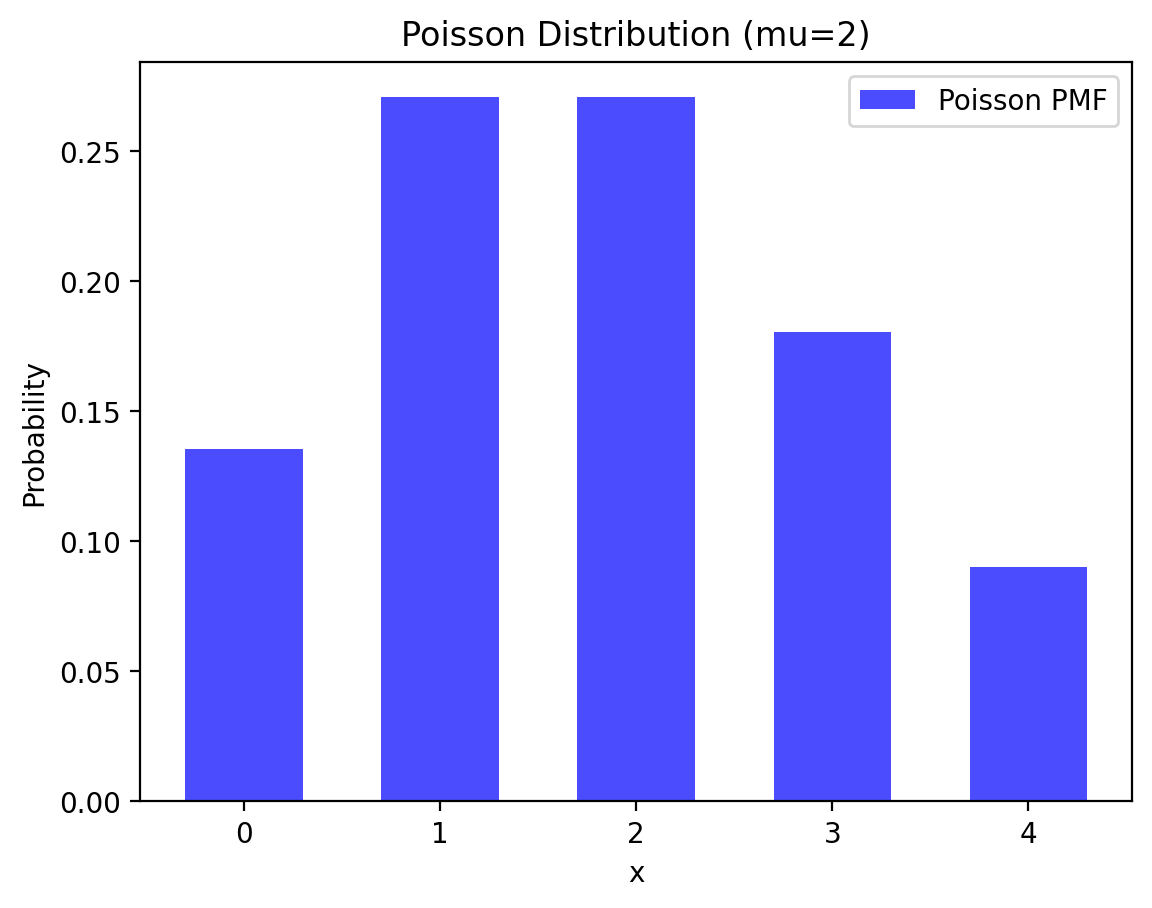

In [9]:
from scipy.stats import poisson # VERY useful


mu = 2 # Attempt number 1 at mapping Poisson distribution to this thing.
x = np.arange(0, 5, 1)  # Input values
pmf = poisson.pmf(x, mu)  # Probability mass function (PMF)

plt.bar(x, pmf, width=0.6, color='blue', alpha=0.7, label='Poisson PMF') # Plotting the PMF

plt.xlabel('x')
plt.ylabel('Probability')
plt.title(f'Poisson Distribution (mu={mu})')
plt.legend()
plt.show()


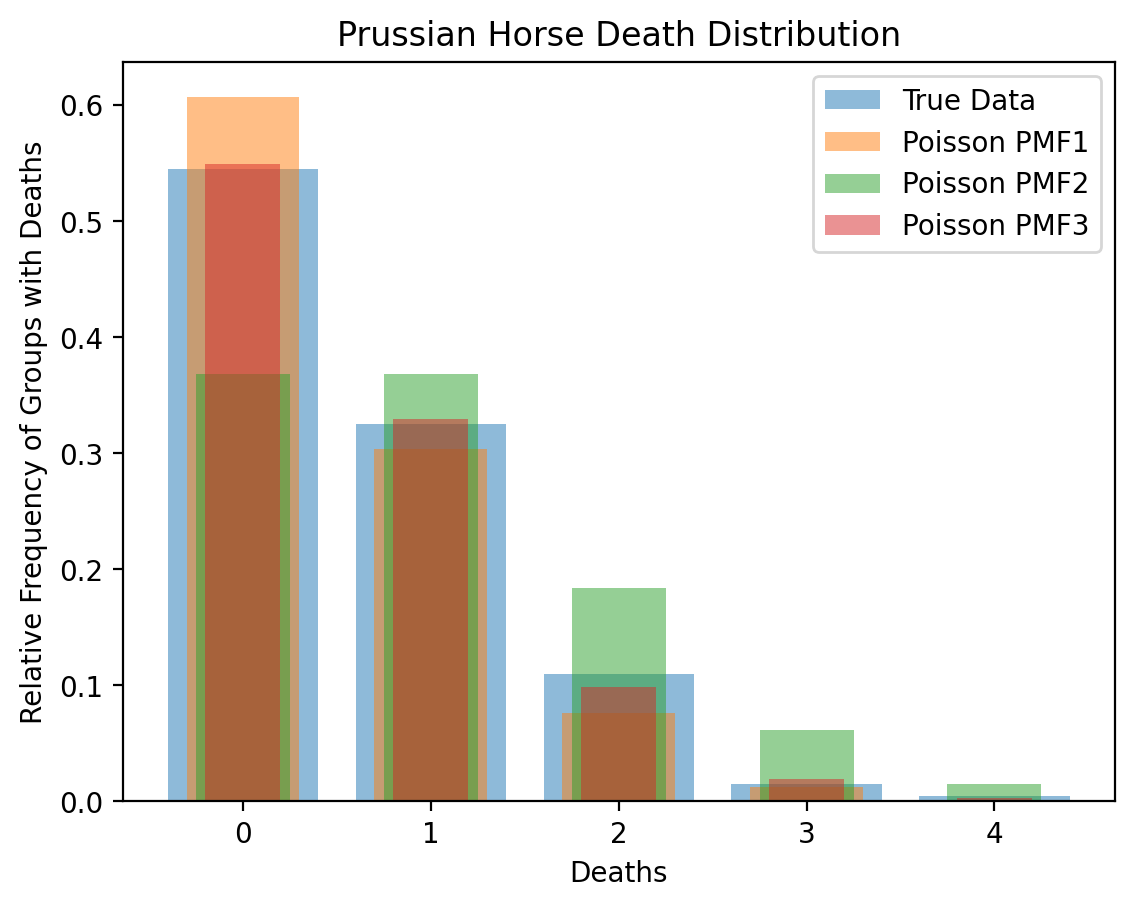

In [13]:
# Attempt with other Poisson distributions

data = [[0, 1, 2, 3, 4], [0.545, 0.325, 0.11, 0.015, 0.005]] # Prussian data
plt.bar(data[0], data[1], alpha=0.5, label='True Data') # Plotting the data

# Attempt 1
mu_1 = 0.5
x_1 = np.arange(0, 5, 1)  
pmf_1 = poisson.pmf(x_1, mu_1) 
plt.bar(x_1, pmf_1, width=0.6, alpha=0.5, label='Poisson PMF1')

# Attempt 2
mu_2 = 1
x_2 = np.arange(0, 5, 1)  
pmf_2 = poisson.pmf(x_2, mu_2) 
plt.bar(x_2, pmf_2, width=0.5, alpha=0.5, label='Poisson PMF2')

# Attempt 3
mu_3 = 0.6
x_3 = np.arange(0, 5, 1)  
pmf_3 = poisson.pmf(x_3, mu_3) 
plt.bar(x_3, pmf_3, width=0.4, alpha=0.5, label='Poisson PMF3')


plt.xlabel('Deaths')
plt.ylabel('Relative Frequency of Groups with Deaths')
plt.legend()
plt.title('Prussian Horse Death Distribution')
plt.show()

### PART C

In [17]:
# From lecture: "where the mean $\mu$ completely characterizes the distribution. 
# The mode is $(\mu-1)$, the standard deviation is $\sqrt{\mu}$, the skewness is 
# $1/\sqrt{\mu}$, and the kurtosis is $1/\mu$." Use as so:

# Weighted mean. Putting into arrays bc numpy hates me:
data_0 = np.array(data[0])
data_1 = np.array(data[1])
weighted_mu = np.sum(data_0 * data_1)

# Standard deviation
std_dev = np.sqrt(weighted_mu)

# Skewness
skewness = 1/np.sqrt(weighted_mu)

# Kurtosis
kurtosis = 1/weighted_mu

print(f'Weighted mean: {weighted_mu}')
print(f'Standard deviation: {std_dev}')
print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurtosis}')


Weighted mean: 0.6100000000000001
Standard deviation: 0.7810249675906655
Skewness: 1.2803687993289596
Kurtosis: 1.6393442622950818


### PART D

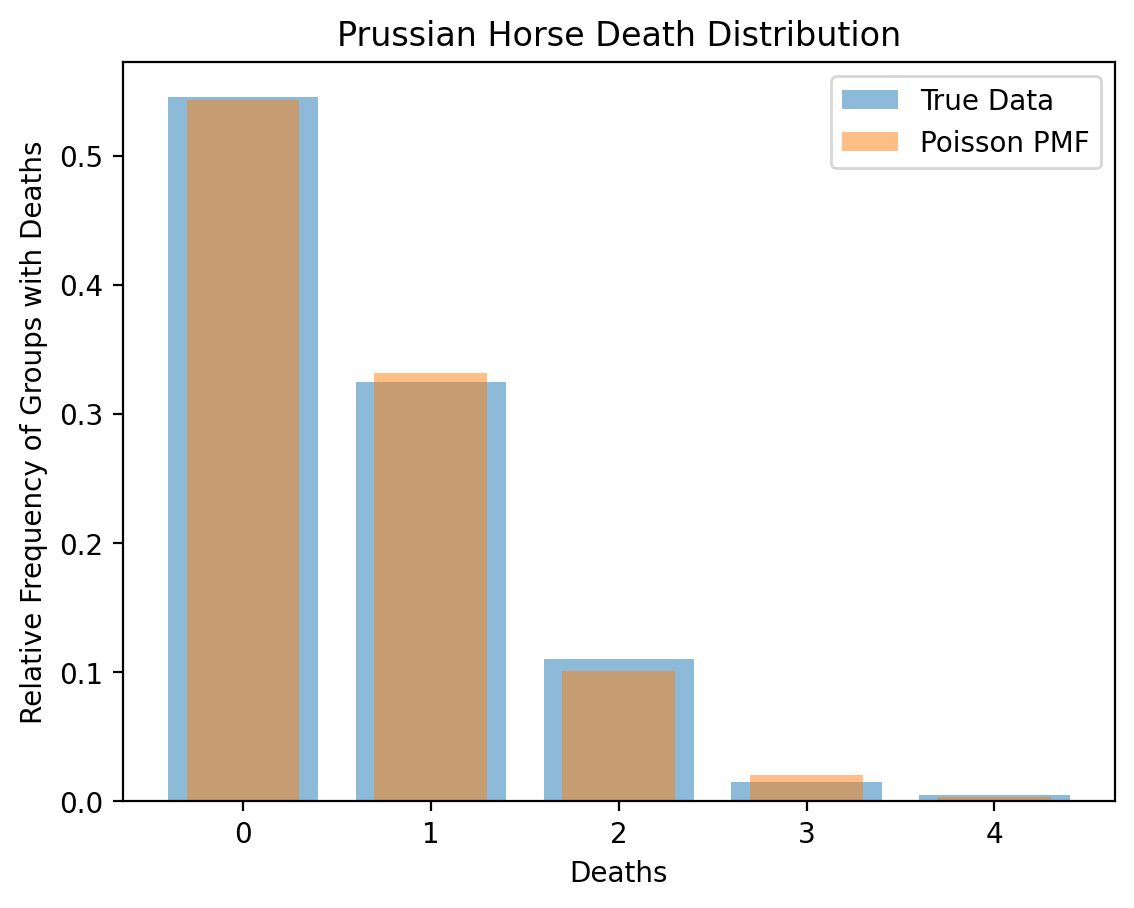

In [18]:
# Attempt with proper Poisson distribution.
# COMPLETELY characterized by the mean!!!

data = [[0, 1, 2, 3, 4], [0.545, 0.325, 0.11, 0.015, 0.005]] # Prussian data
plt.bar(data[0], data[1], alpha=0.5, label='True Data') # Plotting the data

# Attempt 4
mu_final = weighted_mu
x_final = np.arange(0, 5, 1)  
pmf_final = poisson.pmf(x_final, mu_final) 
plt.bar(x_final, pmf_final, width=0.6, alpha=0.5, label='Poisson PMF')

plt.xlabel('Deaths')
plt.ylabel('Relative Frequency of Groups with Deaths')
plt.legend()
plt.title('Prussian Horse Death Distribution')
plt.show()